<a href="https://colab.research.google.com/github/Taiba528/Datasciencecoursera/blob/master/Ham_SpamCLassification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import collections
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
uploaded=files.upload()

Saving SMS-Messages2.csv to SMS-Messages2 (3).csv


In [0]:
df = pd.read_csv("SMS-Messages2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    Message     266 non-null    object
 1   Class_Label  202 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB


In [0]:
#explore the data
df.shape
df.size
df.head()
df.tail()
type(df)

(266, 2)

532

,Message,Class_Label
0,'Go until jurong point,ham
1,'Ok lar... Joking wif u oni...',ham
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam
3,'U dun say so early hor... U c already then sa...,ham
4,'Nah I don\'t think he goes to usf,ham


,Message,Class_Label
261,"<script src=""https://reva.linkstreet.i...",NaN
262,"<script src=""https://reva.linkstreet.i...",NaN
263,"<script src=""https://reva.linkstreet.i...",NaN
264,</body>,NaN
265,</html>,NaN


pandas.core.frame.DataFrame

In [0]:
#check for missing values
pd.isnull(df).any()
pd.isnull(df).sum()

 Message       False
Class_Label     True
dtype: bool

 Message        0
Class_Label    64
dtype: int64

In [0]:
df['Class_Label'].value_counts()

ham                     167
spam                     33
 initial-scale=1.0">      1
chrome=1">                1
Name: Class_Label, dtype: int64

Text(0.5, 0, 'Label')

Text(0.5, 1.0, 'Number of ham and spam messages')

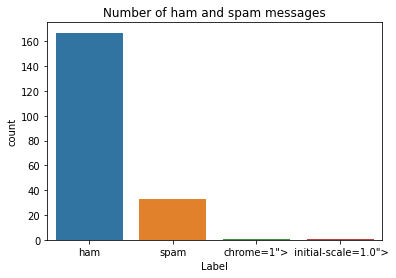

In [0]:
#Visualize the number of ham and spam messages
sns.countplot(df['Class_Label'])
plt.xlabel('Label')
plt.title('Number of ham and spam messages')


In [0]:
#split the data in feature and labels
X = df[' Message']
Y = df['Class_Label']
X.head()
Y.head()


0                               'Go until jurong point
1                      'Ok lar... Joking wif u oni...'
2    'Free entry in 2 a wkly comp to win FA Cup fin...
3    'U dun say so early hor... U c already then sa...
4                   'Nah I don\'t think he goes to usf
Name:  Message, dtype: object

0     ham
1     ham
2    spam
3     ham
4     ham
Name: Class_Label, dtype: object

In [38]:
from nltk.tokenize import word_tokenize
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

NameError: ignored

In [0]:
text=df.iloc

In [0]:
#dummy coading using the loop structure
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=pd.Categorical( df[col]).codes

# Tokenization

## The first step in text analytics after reading the file is tokenization .It can be done at sentence level,word level or even character level.Here I am tokenizing it at word level.

In [40]:
tokens = nltk.word_tokenize(X)
print("Tokens : ",tokens[:20])
print("\n Total Tokens : ",len(tokens))

TypeError: ignored

In [0]:
text = []
f_in = open("SMS-Messages2.csv",'r')
for line in f_in.readlines():
    text.append(line)
f_in.close()

In [0]:
text

[' Message,Class_Label\n',
 "'Go until jurong point,ham\n",
 "'Ok lar... Joking wif u oni...',ham\n",
 "'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\\'s apply 08452810075over18\\'s',spam\n",
 "'U dun say so early hor... U c already then say...',ham\n",
 "'Nah I don\\'t think he goes to usf,ham\n",
 "'FreeMsg Hey there darling it\\'s been 3 week\\'s now and no word back! I\\'d like some fun you up for it still? Tb ok! XxX std chgs to send,spam\n",
 "'Even my brother is not like to speak with me. They treat me like aids patent.',ham\n",
 "'As per your request \\'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune',ham\n",
 "'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',spam\n",
 "'Had your mobile 11 month

In [0]:
corpus = [] #Create an empty corpus
ps = PorterStemmer() # For Stemming the words to original form
stop_words = set(stopwords.words('english')) # removes words like will, i, and, it etc
for i in range(1,2000):
  
  # Convert all words to lower case
  text_cln = text_cln.lower()
  # Split sentences in to words
  text_cln = text_cln.split()
  # Remove english stopwords
  text_cln = [x for x in text_cln if not x in stop_words]
  # Lemmatize words to the base form
  wn = nltk.WordNetLemmatizer()
  text_cln = [wn.lemmatize(x) for x in text_cln]
  # Join words to form the original sentence, but cleaned-up
  text_cln = " ".join(text_cln)
  #Append to the list to get all the tweets in one place
  corpus.append(text_cln)

In [0]:
#Clean Corpus
corpus[0:5]

['html', 'html', 'html', 'html', 'html']

In [0]:
#Strip the records and create a word list for each text
word_list = []
for record in (corpus):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
word_list 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Explore Data


In [0]:
#Explore Data
df.shape
type(df)
df.size
df.shape
df.head()
df.tail()

In [0]:
df.Star_Ratings.value_counts()

In [0]:
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

In [0]:
df.Star_Ratings.value_counts().plot(kind='bar', color=["green","olive","yellow","orange","red"],)

In [0]:
df['Ratings_category'] = df['Star_Ratings'].apply(lambda Ratings: 'positive' if Ratings > 3 else 'negative')
df.head(3)

In [0]:
df.Ratings_category.value_counts()

In [0]:
df.Ratings_category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "red",])

In [0]:
df_positive=df[df['Ratings_category'] == 'positive']
df_negative=df[df['Ratings_category']=='negative']

In [0]:
Reviews_all=" ".join(review for review in df.Ratings_category)
Reviews_positive=" ".join(review for review in df_positive.Reviews)
Reviews_negative=" ".join(review for review in df_negative.Reviews)


In [0]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
fig, ax = plt.subplots(3, 1, figsize  = (20,20))
#wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets)
wordcloud_positive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Reviews_positive)
wordcloud_negative = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Reviews_negative)
# Display the generated image:
ax[0].imshow(wordcloud_positive, interpolation='bilinear')
ax[0].set_title('Positive Reviews', fontsize=20)
ax[0].axis('off')
ax[1].imshow(wordcloud_negative, interpolation='bilinear')
ax[1].set_title('Negative Reviews',fontsize=20)
ax[1].axis('off')

In [0]:
word_list = []

max = len(df.Reviews)
for i in range (max):
  R1= df.Reviews[i]
  tokens = R1.split()
  #print(tokens)
  words = []
  
  for token in tokens:
    words.append(token.lower())
  word_list.append(words) 
print(len(word_list))
word_list[0:5]

In [0]:
from google.colab import files
uploaded=files.upload()

In [0]:
lex_file = open("AFINN-111.csv",encoding='cp1252')

In [0]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
    


In [0]:
#For each word in text
#Get the word score (score is a number if the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
sentiment_score = []
for text in word_list:
    score = 0
    for word in text:
        if word in (lexicons):
            score = int(score + lexicons[word])
    sentiment_score.append(score)
sentiment_score[5]

In [0]:
df['sentiment_score'] = sentiment_score
df.head()

In [0]:
df['Pred_Ratings_category'] = df['sentiment_score'].apply(lambda sentiment_score: 'positive' if sentiment_score > 0 else 'negative')
df.head()

In [0]:
df.to_csv('IIMB.csv')

In [0]:
df.Pred_Ratings_category.value_counts()

In [0]:
df.Pred_Ratings_category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "red",])

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(df['Ratings_category'],df['Pred_Ratings_category'])

In [0]:
df_1 = df[['Reviews','sentiment_score','Star_Ratings']]
df_1.head(3)

In [0]:
df_1.to_csv('IIMB_F.csv')

## Creating Labels and Features to apply ML models

In [0]:
x = df_1['Reviews']
x.head()

In [0]:
y = df_1.iloc[:, -1]
y.head()

In [0]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 

In [0]:
# To extract max 1500 feature. 
# "max_features" is attribute to 
# experiment with to get better results 
cv = CountVectorizer(max_features = 1500)  
  

In [0]:
X = cv.fit_transform(x).toarray()  
X

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [0]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

In [0]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()
lm = lm.fit(x,y)
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
coefficients
lm.intercept_

# KNN model

In [0]:
#KNN models with only 1 neighbour
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [0]:
error = []

# Calculating error for K values between 1 and 5
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(error)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [0]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

In [0]:
y_pred = classifier.predict(X_test)


In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [0]:
error = []

# Calculating error for K values between 1 and 5
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(error)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [0]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

In [0]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [0]:
error = []

# Calculating error for K values between 1 and 5
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(error)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [0]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

In [0]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [0]:
error = []

# Calculating error for K values between 1 and 5
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(error)

In [0]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [0]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Random Forest 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [0]:

# Fitting Random Forest Classification 
# to the Training set 
from sklearn.ensemble import RandomForestClassifier 
  
# n_estimators can be said as number of 
# trees, experiment with n_estimators 
# to get better results  
model = RandomForestClassifier(n_estimators = 501, 
                            criterion = 'entropy') 
                              
model.fit(X_train, y_train) 

In [0]:
# Predicting the Test set results 
y_pred = model.predict(X_test)  

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [0]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
fig, ax = plt.subplots(3, 1, figsize  = (20,20))
# Create and generate a word cloud image:
df_new_positive=df[df['Ratings_category'] == 'positive']
df_new_negative=df[df['Ratings_category']=='negative']
tweet_all=" ".join(review for review in df.Tweet)
tweet_positive=" ".join(review for review in df_positive.Tweet)
tweet_negative=" ".join(review for review in df_negative.Tweet)
tweet_neutral=" ".join(review for review in df_neutral.Tweet)
#wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets)
wordcloud_positive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_positive)
wordcloud_negative = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_negative)
wordcloud_neutral = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_neutral)
# Display the generated image:
ax[0].imshow(wordcloud_positive, interpolation='bilinear')
ax[0].set_title('Positive Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_negative, interpolation='bilinear')
ax[1].set_title('Negative Tweets',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_neutral, interpolation='bilinear')
ax[2].set_title('Neutral Tweets',fontsize=30)
ax[2].axis('off')


In [0]:
df_neutral=df[df['Ratings_category']=='neutral']

In [0]:
text = []
f_in = open("Amazon Reviews with Ratings.csv",'r')
for line in f_in.readlines():
    text.append(line)
f_in.close()

In [0]:
corpus = [] #Create an empty corpus
ps = PorterStemmer() # For Stemming the words to original form
stop_words = set(stopwords.words('english')) # removes words like will, i, and, it etc
for i in range(1,2000):
  #removes handles (@), numbers, urls emojis and any other special charcters to have only text
  text_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", ' ',text[i])
  # Convert all words to lower case
  text_cln = text_cln.lower()
  # Split sentences in to words
  text_cln = text_cln.split()
  # Remove english stopwords
  text_cln = [x for x in text_cln if not x in stop_words]
  # Lemmatize words to the base form
  wn = nltk.WordNetLemmatizer()
  text_cln = [wn.lemmatize(x) for x in text_cln]
  # Join words to form the original sentence, but cleaned-up
  text_cln = " ".join(text_cln)
  #Append to the list to get all the tweets in one place
  corpus.append(text_cln)

In [0]:
#Clean Corpus
corpus[0:5]

In [0]:
#Strip the records and create a word list for each text
word_list = []
for record in (corpus):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
word_list 

In [0]:
print(word_list)

In [0]:
new_word_list = []
for word in word_list:
    if(word in words_remove):
        pass
else:
    new_word_list.append(word)
    print(new_word_list)


In [0]:
bagofwords = []
for i in range(1,1999):
  words = corpus[i].split()
  bagofwords.append(words)
  

In [0]:
bagofwords[0]

In [0]:
all_words = list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print('Most commonly occuring words and frequency\n')
words_freq = collections.Counter(all_words)
words_freq.most_common(20)

In [0]:
len(all_words)

In [0]:
print(all_words[0:10])

In [0]:
# Remove those words which are not contributing in analysis like star,phone,pro...
words_remove = ['star','phone','pro','one','oneplus','plus','review']
  

In [0]:
filtered_words = [] 
  
for w in all_words: 
    if w not in words_remove: 
        filtered_words.append(w) 
  
print(all_words) 
print(filtered_words) 

In [0]:
print('Most commonly occuring words and frequency\n')
words_freq = collections.Counter(all_words)
words_freq.most_common(20)

In [0]:
freq_word_df = pd.DataFrame(words_freq.most_common(15), columns=['Words','Freq'])
freq_word_df.head()

In [0]:
text = []
f_in = open("Amazon Reviews with Ratings.csv",'r')
for line in f_in.readlines():
    text.append(line)
f_in.close()

In [0]:
fig,ax = plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='Words', y = 'Freq', ax=ax, color = "CRIMSON")
plt.show()

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string= " ".join(freq_word_df.Words)
wordcloud = WordCloud(#stopwords = STOPWORDS,
                          background_color='WHITE',
                      max_words=20
                         ).generate(word_string)

In [0]:
plt.figure(figsize=(15,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
sentiment_text = [TextBlob(text) for text in corpus]
print(sentiment_text[5].polarity)
print(sentiment_text[5])

In [0]:
sentiments = [[text.sentiment.polarity, str(text)] for text in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns = ["Polarity", "text"])
sentiment_df.sort_values(by= 'Polarity', ascending=False)

In [0]:
fig, ax = plt.subplots(figsize=(15,10))
#Plot the histogram of the polarity values
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color = '#2B2CBA')
plt.title